<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   확진자     9 non-null      object
 1   확진률     9 non-null      object
 2   등록일시분초  9 non-null      object
 3   치명률     9 non-null      object
 4   사망자     9 non-null      object
 5   사망률     9 non-null      object
 6   구분      9 non-null      object
 7   게시글 번호  9 non-null      object
 8   수정일시분초  0 non-null      object
 9   등록일자    9 non-null      object
dtypes: object(10)
memory usage: 792.0+ bytes


<BarContainer object of 9 artists>

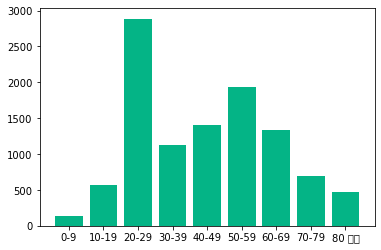

In [53]:
import json
import requests
import xmltodict
import pandas as pd 
import matplotlib.pyplot as plt

# service key = ''
requset_url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19GenAgeCaseInfJson?serviceKey=gZ1mis9Xa%2FvXgaEyc0FxYyZ7QvEq1u5WTu4U5thsna%2Bbp3lNV0RztdYSw%2FIuvOIZkJWjETFZRUMG%2FcpQuJgHwA%3D%3D&pageNo=1&numOfRows=10&startCreateDt=20200310&endCreateDt=20200414&'

res = requests.get(requset_url)
res.text

xml_data = xmltodict.parse(res.text)
json_raw = json.dumps(xml_data)
json_data = json.loads(json_raw)
json_data

data = []
for item in json_data['response']['body']['items']['item']:
    data.append(item)

data #칼럼으로 들어감
df = pd.DataFrame(data)
df.columns = ['확진자', '확진률','등록일시분초','치명률','사망자','사망률','구분','게시글 번호', '수정일시분초']
df['구분'].unique()

#연령별/ 확진자 수를 나타내는 그래프를 출력하시오.(2020-04-14)
df['등록일자'] = pd.to_datetime(df['등록일시분초']).dt.strftime('%Y-%m-%d')
df.head()
df.groupby(by='등록일자').count()

df2 = df[df['등록일자'] == '2020-04-14']
df2 
df3 = df2.iloc[:9, :]
df3.info()
plt.bar(df3['구분'], df3['확진자'].astype(float) , color='#04B486')